Start


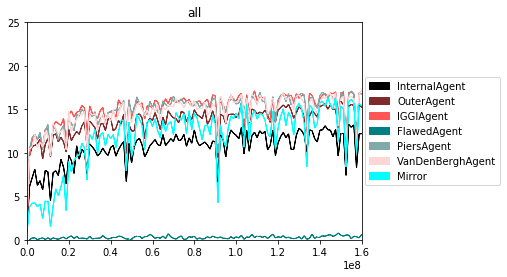

Score with InternalAgent: 11.274444444444445
Score with OuterAgent: 14.35
Score with IGGIAgent: 15.416666666666666
Score with FlawedAgent: 0.4366666666666666
Score with PiersAgent: 15.248888888888889
Score with VanDenBerghAgent: 14.883333333333333
Score with Mirror: 13.734444444444444
Average: 12.192063492063491


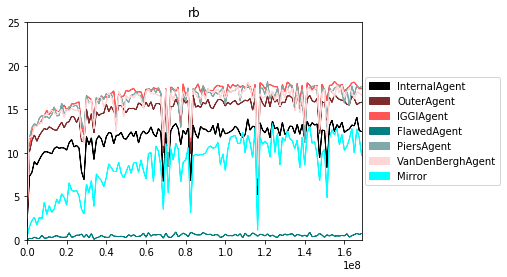

Score with InternalAgent: 13.00222222222222
Score with OuterAgent: 15.92222222222222
Score with IGGIAgent: 17.655555555555555
Score with FlawedAgent: 0.5344444444444445
Score with PiersAgent: 16.96666666666667
Score with VanDenBerghAgent: 16.95
Score with Mirror: 11.433333333333334
Average: 13.209206349206351


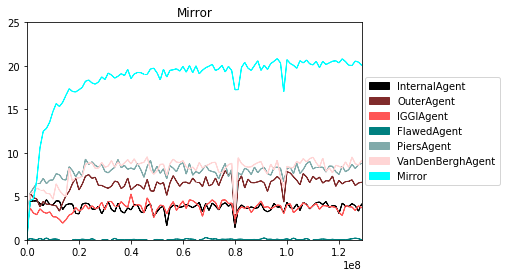

Score with InternalAgent: 3.7955555555555556
Score with OuterAgent: 6.646666666666667
Score with IGGIAgent: 3.585555555555555
Score with FlawedAgent: 0.06777777777777777
Score with PiersAgent: 8.183333333333334
Score with VanDenBerghAgent: 8.571111111111112
Score with Mirror: 20.426666666666666
Average: 7.325238095238096


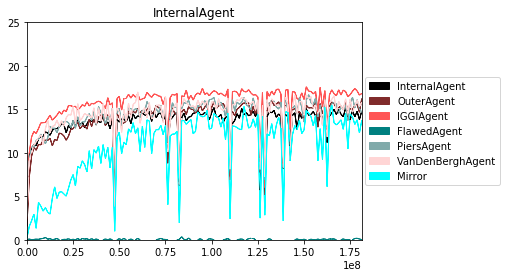

Score with InternalAgent: 14.375555555555556
Score with OuterAgent: 15.204444444444444
Score with IGGIAgent: 16.92
Score with FlawedAgent: 0.061111111111111116
Score with PiersAgent: 15.325555555555557
Score with VanDenBerghAgent: 15.403333333333334
Score with Mirror: 13.270000000000001
Average: 12.937142857142858


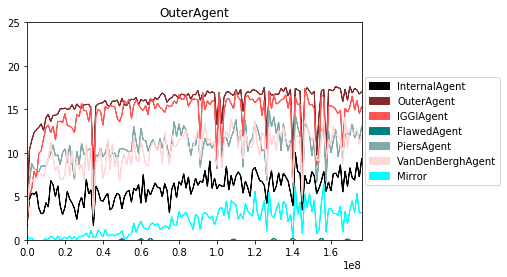

Score with InternalAgent: 7.3933333333333335
Score with OuterAgent: 16.95111111111111
Score with IGGIAgent: 14.745555555555555
Score with FlawedAgent: 0.01
Score with PiersAgent: 11.78111111111111
Score with VanDenBerghAgent: 11.782222222222222
Score with Mirror: 3.2622222222222224
Average: 9.417936507936508


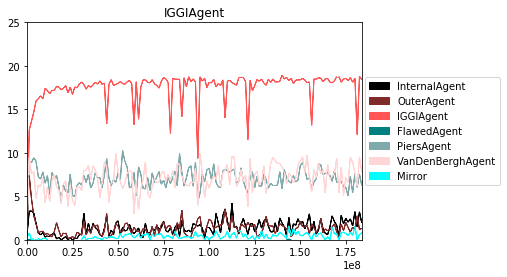

Score with InternalAgent: 2.341111111111111
Score with OuterAgent: 1.5322222222222222
Score with IGGIAgent: 17.74555555555556
Score with FlawedAgent: 0.0
Score with PiersAgent: 6.436666666666666
Score with VanDenBerghAgent: 7.67
Score with Mirror: 0.7155555555555555
Average: 5.205873015873016


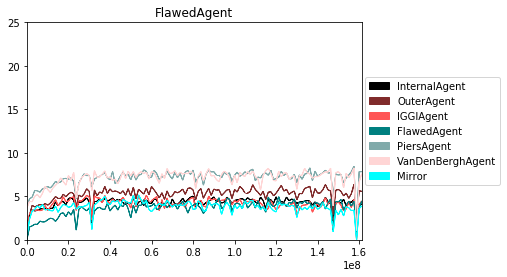

Score with InternalAgent: 4.018888888888889
Score with OuterAgent: 5.154444444444444
Score with IGGIAgent: 3.545555555555556
Score with FlawedAgent: 3.7388888888888894
Score with PiersAgent: 6.872222222222223
Score with VanDenBerghAgent: 6.63
Score with Mirror: 2.993333333333333
Average: 4.707619047619048


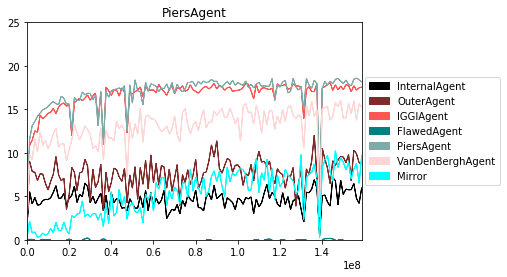

Score with InternalAgent: 5.428888888888889
Score with OuterAgent: 9.20111111111111
Score with IGGIAgent: 17.462222222222223
Score with FlawedAgent: 0.0044444444444444444
Score with PiersAgent: 18.243333333333332
Score with VanDenBerghAgent: 14.978888888888891
Score with Mirror: 8.232222222222221
Average: 10.507301587301587


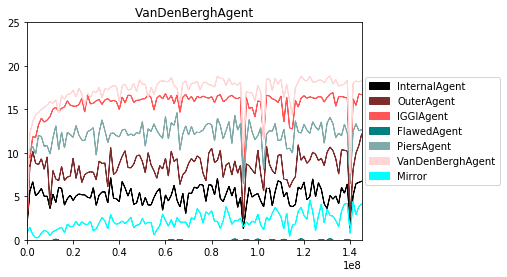

Score with InternalAgent: 5.167777777777778
Score with OuterAgent: 8.809999999999999
Score with IGGIAgent: 15.093333333333332
Score with FlawedAgent: 0.005555555555555556
Score with PiersAgent: 11.850000000000001
Score with VanDenBerghAgent: 16.91111111111111
Score with Mirror: 3.0277777777777777
Average: 8.695079365079364


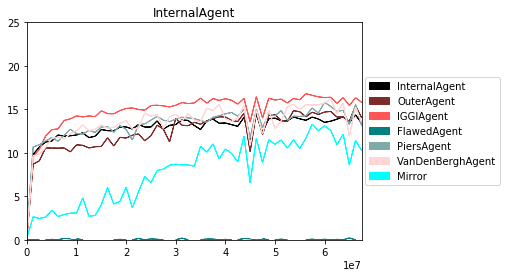

Score with InternalAgent: 13.85666666666667
Score with OuterAgent: 14.440000000000001
Score with IGGIAgent: 16.26666666666667
Score with FlawedAgent: 0.043333333333333335
Score with PiersAgent: 14.842222222222222
Score with VanDenBerghAgent: 15.098888888888888
Score with Mirror: 11.813333333333333
Average: 12.33730158730159
[[11.274 14.350 15.417 0.437 15.249 14.883 13.734]
 [13.002 15.922 17.656 0.534 16.967 16.950 11.433]
 [3.796 6.647 3.586 0.068 8.183 8.571 20.427]
 [14.376 15.204 16.920 0.061 15.326 15.403 13.270]
 [7.393 16.951 14.746 0.010 11.781 11.782 3.262]
 [2.341 1.532 17.746 0.000 6.437 7.670 0.716]
 [4.019 5.154 3.546 3.739 6.872 6.630 2.993]
 [5.429 9.201 17.462 0.004 18.243 14.979 8.232]
 [5.168 8.810 15.093 0.006 11.850 16.911 3.028]
 [13.857 14.440 16.267 0.043 14.842 15.099 11.813]]


In [38]:
import os
import re
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

paths = ["../Logs/Rainbow/Paired/20200517-003117all/checkpoints",
        "../Logs/Rainbow/Paired/20200517-003133rb/checkpoints",
        "../Logs/Rainbow/Paired/20200517-003144Mirror/checkpoints",
        "../Logs/Rainbow/Paired/20200517-003208InternalAgent/checkpoints",
        "../Logs/Rainbow/Paired/20200517-003244OuterAgent/checkpoints",
        "../Logs/Rainbow/Paired/20200517-003259IGGIAgent/checkpoints",
        "../Logs/Rainbow/Paired/20200517-003309FlawedAgent/checkpoints",
        "../Logs/Rainbow/Paired/20200517-003320PiersAgent/checkpoints",
        "../Logs/Rainbow/Paired/20200517-003331VanDenBerghAgent/checkpoints",
        "../Logs/Rainbow/Paired/20200521-035624InternalAgent/checkpoints",]

# paths = ["../Logs/Rainbow/Paired/20200515-114852Mirror/checkpoints"]




agents = ['InternalAgent', 'OuterAgent', 'IGGIAgent', 'FlawedAgent', 'PiersAgent', 'VanDenBerghAgent', 'Mirror']

class Entry:
    def __init__(self,iteration,matchups):
        self.iteration=iteration
        self.matchups=matchups

        
    def __str__(self):
        return str(self.iteration) + "\n" + str(self.matchups)


def get_agent_results(path):
    iteration_results = []
    for r, d, f in os.walk(p):  
        for file in f:
            if 'eval' in file and '.swp' not in file:
                iteration = int(file.split('eval')[1])
                matchups = []
                with open(os.path.join(r,file)) as data:
                    lines = data.readlines()
                    for l in lines:
                        tokens = l.split()
                        matchups.append(tokens)
#                         print(matchups)
                iteration_results.append(Entry(iteration,matchups))
            iteration_results.sort(key = lambda x : x.iteration)
    return iteration_results

def make_csv(name,results,score_index):
    with open(name,"w",newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=';',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
        partners = ["Iteration"] + [m[1] for m in iteration_results[0].matchups]
        writer.writerow(partners)
        for entry in iteration_results:
            line = [entry.iteration] + [m[score_index] for m in entry.matchups]
            writer.writerow(line)
    
def make_plot(name,iteration_results,score_index):
    ax = plt.axes()
    ax.set_title(name)
    ax.set_xlim(0,5000*max((e.iteration for e in iteration_results)))
    ax.set_ylim(0,25)
    
    colors = []
    patch = []
    num_agents = len(iteration_results[0].matchups)
    
    for i in range(num_agents):
        r = (i%3)*0.5
        g = ((i/3)%3)*0.5
        b = (i/3.0)*0.5
        color = (r,g,b)
        colors.append(color)
        
        patch.append(mpatches.Patch(color=color, label=agents[i]))
    
    plt.legend(handles=patch, loc=(1.01,0.25))

    previous_x = None
    previous_y = None
    
    for entry in iteration_results:
        x = entry.iteration*5000
        y_array = [float(m[score_index]) for m in entry.matchups]
        
        for index, y in enumerate(y_array):

            color = colors[index]            
            if previous_x is not None:
                dx = x-previous_x
                dy = y-previous_y[index]
            
                ax.arrow(x,y,-dx,-dy,fc = 'k',ec = color)
#                 print(x,dx,y,dy)
        
        previous_x = x
        previous_y = y_array
            
    plt.show()


score_index = 2
# with open("results.csv","w",newline='') as csvfile:
print("Start")
summary = np.zeros((len(paths),len(agents)))
i =0
for p in paths:
    agent = p[38:-12]
    name = agent + str(score_index) + ".csv"
    iteration_results = get_agent_results(p)
    make_csv(name,iteration_results,score_index)
    
    make_plot(agent,iteration_results,score_index)
    
#     average = 0.0
#     for m in iteration_results[-1].matchups:
#         score = float(m[score_index])
#         print("Score with {0}: {1}".format(m[1],score))
#         average += score
#         summary[i][j]= score
#         j+=1
#     print("Average: {0}".format(average/len(iteration_results[-1].matchups)))
#     i+=1
    averages = np.zeros(len(agents))
    for r in iteration_results[-10:-1]:
        j=0
        for m in r.matchups:
            score = float(m[score_index])
            averages[j] += score/len(iteration_results[-10:-1])
            j+=1
    for j, avg in enumerate(averages):
        print("Score with {0}: {1}".format(agents[j],avg))
        summary[i][j] = avg
    print("Average: {0}".format(np.average(averages)))
    i+=1

np.set_printoptions(suppress=True, formatter={'float_kind':'{:2.3f}'.format}, linewidth=130)
print(np.array2string(summary))
    

        
        
    
    


# #         for i, r in enumerate(iteration_results):
# #             if i<5:
# #                 print(r)
                
#         writer = csv.writer(csvfile, delimiter=';',
#                             quotechar='|', quoting=csv.QUOTE_MINIMAL)
#         print(iteration_results[0])
#         partners = ["Iteration"] + [m[1] for m in iteration_results[0].matchups]
#         writer.writerow(partners)
#         print(partners)
#         for entry in iteration_results:
#             line = [entry.iteration] + [m[score_index] for m in entry.matchups]
#             writer.writerow(line)
# #         for i in range(iteration_results[0]
            
    
#             print(iteration_results)
                    
#                 data = iteration_stats = parse_file(file)